# Model Development - Inception V3 - 30% Test Size - Epoch 20

In [13]:
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

In [14]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_17288/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [15]:
train_files = os.listdir('train/')
test_files = os.listdir('test/')

In [16]:
train_df = filtered_df[filtered_df.index.isin(train_files)]

train_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
000201.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [17]:
male_data = train_df.loc[train_df['Male'] == '1']['Male']
female_data = train_df.loc[train_df['Male'] == '-1']['Male']
total_data = male_data.count() + female_data.count()

print("Training data male / female ratio")
{
  "male data": male_data.count(),
  "female data": female_data.count(),
  "total data": total_data,
  'ratio male data': male_data.count() / total_data,
  'ratio female data': female_data.count() / total_data
}

Training data male / female ratio


/tmp/ipykernel_17288/1895681520.py:10: RuntimeWarning: invalid value encountered in scalar divide
  'ratio male data': male_data.count() / total_data,
/tmp/ipykernel_17288/1895681520.py:11: RuntimeWarning: invalid value encountered in scalar divide
  'ratio female data': female_data.count() / total_data


{'male data': 0,
 'female data': 0,
 'total data': 0,
 'ratio male data': nan,
 'ratio female data': nan}

In [18]:
test_df = filtered_df[filtered_df.index.isin(test_files)]

test_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000352.jpg,-1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000414.jpg,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000608.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
000798.jpg,-1,-1,-1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201867.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
201956.jpg,1,1,-1,-1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
201989.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202200.jpg,-1,-1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1


In [19]:
male_data = test_df.loc[test_df['Male'] == '1']['Male']
female_data = test_df.loc[test_df['Male'] == '-1']['Male']
total_data = male_data.count() + female_data.count()

print("Test data male / female ratio")
{
  "male data": male_data.count(),
  "female data": female_data.count(),
  "total data": total_data,
  'ratio male data': male_data.count() / total_data,
  'ratio female data': female_data.count() / total_data
}

Test data male / female ratio


/tmp/ipykernel_17288/43310548.py:10: RuntimeWarning: invalid value encountered in scalar divide
  'ratio male data': male_data.count() / total_data,
/tmp/ipykernel_17288/43310548.py:11: RuntimeWarning: invalid value encountered in scalar divide
  'ratio female data': female_data.count() / total_data


{'male data': 0,
 'female data': 0,
 'total data': 0,
 'ratio male data': nan,
 'ratio female data': nan}

In [20]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.rename(columns={'index': 'image_id'}, inplace=True)
test_df.rename(columns={'index': 'image_id'}, inplace=True)

/tmp/ipykernel_17288/3540797913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'index': 'image_id'}, inplace=True)
/tmp/ipykernel_17288/3540797913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'index': 'image_id'}, inplace=True)


In [33]:
test_df.loc['Male'] = test_df['Male'].astype(str)
train_df.loc['Male'] = train_df['Male'].astype(str)

/tmp/ipykernel_17288/543092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc['Male'] = test_df['Male'].astype(str)
/tmp/ipykernel_17288/543092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc['Male'] = train_df['Male'].astype(str)


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3

0        1
1        1
2        1
3        1
4        1
        ..
1495    -1
1496     1
1497    -1
1498    -1
1499     1
Name: Male, Length: 1500, dtype: object

In [23]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='image_id',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

valid_generator = datagen.flow_from_dataframe(
 dataframe=test_df,
 directory='test/', # Update with the path to your CelebA images
 x_col='image_id',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)


# Load InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(178, 218, 3))

Found 2450 validated image filenames belonging to 2 classes.
Found 450 validated image filenames belonging to 2 classes.


In [24]:
# Create a new model on top of InceptionV3
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator,
 epochs=50,
 validation_data=valid_generator
)

Epoch 1/50
77/77 [==============================] - 25s 92ms/step - loss: 0.3371 - accuracy: 0.8576 - val_loss: 177.1383 - val_accuracy: 0.4222
Epoch 2/50
77/77 [==============================] - 6s 80ms/step - loss: 0.1788 - accuracy: 0.9343 - val_loss: 1.3204 - val_accuracy: 0.8667
Epoch 3/50
77/77 [==============================] - 6s 81ms/step - loss: 0.1228 - accuracy: 0.9547 - val_loss: 0.5347 - val_accuracy: 0.9356
Epoch 4/50
77/77 [==============================] - 6s 80ms/step - loss: 0.0748 - accuracy: 0.9763 - val_loss: 0.3722 - val_accuracy: 0.8956
Epoch 5/50
77/77 [==============================] - 6s 80ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.5459 - val_accuracy: 0.8378
Epoch 6/50
77/77 [==============================] - 6s 81ms/step - loss: 0.0687 - accuracy: 0.9747 - val_loss: 0.3117 - val_accuracy: 0.9200
Epoch 7/50
77/77 [==============================] - 6s 81ms/step - loss: 0.0964 - accuracy: 0.9673 - val_loss: 0.2539 - val_accuracy: 0.9133
Epoch 8/50

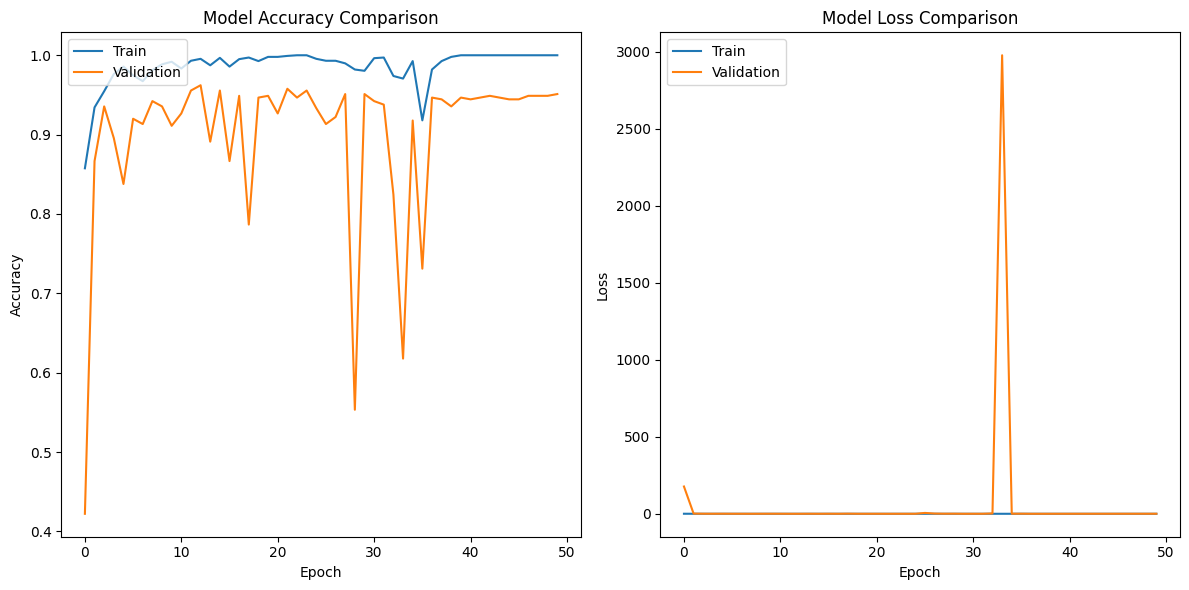

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
# ... (kode lainnya seperti di atas)
# Train the model
# Plot training history
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [26]:
history.history['accuracy']

[0.8575510382652283,
 0.9342857003211975,
 0.9546938538551331,
 0.9763265252113342,
 0.9857142567634583,
 0.9746938943862915,
 0.9673469662666321,
 0.9812244772911072,
 0.9885714054107666,
 0.9918367266654968,
 0.9832652807235718,
 0.9930612444877625,
 0.9955102205276489,
 0.9873469471931458,
 0.9967346787452698,
 0.9857142567634583,
 0.995102047920227,
 0.9971428513526917,
 0.9926530718803406,
 0.9979591965675354,
 0.9979591965675354,
 0.9991836547851562,
 1.0,
 1.0,
 0.9955102205276489,
 0.9930612444877625,
 0.9930612444877625,
 0.9897959232330322,
 0.9820408225059509,
 0.9804081916809082,
 0.9963265061378479,
 0.9971428513526917,
 0.9738775491714478,
 0.9706122279167175,
 0.9926530718803406,
 0.9179592132568359,
 0.9820408225059509,
 0.9926530718803406,
 0.9979591965675354,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [27]:
history.history['val_accuracy']

[0.42222222685813904,
 0.8666666746139526,
 0.9355555772781372,
 0.8955555558204651,
 0.8377777934074402,
 0.9200000166893005,
 0.9133333563804626,
 0.9422222375869751,
 0.9355555772781372,
 0.9111111164093018,
 0.9266666769981384,
 0.9555555582046509,
 0.9622222185134888,
 0.8911111354827881,
 0.9555555582046509,
 0.8666666746139526,
 0.948888897895813,
 0.7866666913032532,
 0.9466666579246521,
 0.948888897895813,
 0.9266666769981384,
 0.9577777981758118,
 0.9466666579246521,
 0.9555555582046509,
 0.9333333373069763,
 0.9133333563804626,
 0.9222221970558167,
 0.9511111378669739,
 0.5533333420753479,
 0.9511111378669739,
 0.9422222375869751,
 0.9377777576446533,
 0.8244444727897644,
 0.6177777647972107,
 0.9177777767181396,
 0.7311111092567444,
 0.9466666579246521,
 0.9444444179534912,
 0.9355555772781372,
 0.9466666579246521,
 0.9444444179534912,
 0.9466666579246521,
 0.948888897895813,
 0.9466666579246521,
 0.9444444179534912,
 0.9444444179534912,
 0.948888897895813,
 0.9488888978958

In [28]:
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

 1/15 [=>............................] - ETA: 1s - loss: 0.2537 - accuracy: 0.9688

15/15 [==============================] - 0s 22ms/step - loss: 0.3716 - accuracy: 0.9511
Validation Loss: 0.37161126732826233
Validation Accuracy: 0.9511111378669739


15/15 [==============================] - 0s 21ms/step - loss: 0.3716 - accuracy: 0.9511
Validation Loss: 0.37161123752593994
Validation Accuracy: 0.9511111378669739
15/15 [==============================] - 1s 20ms/step


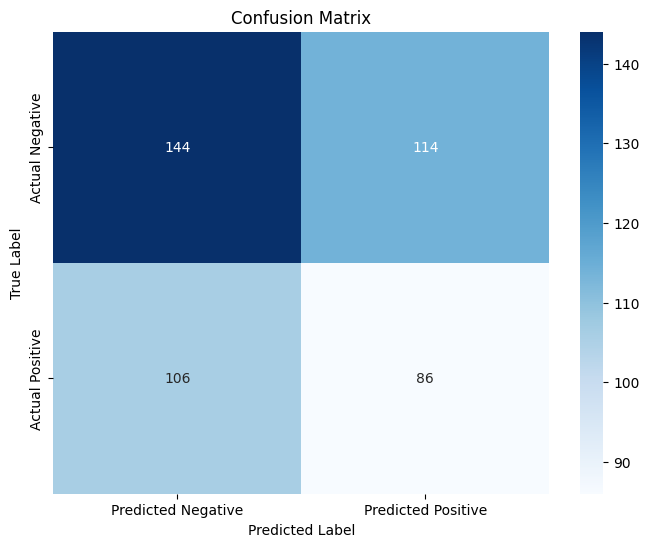

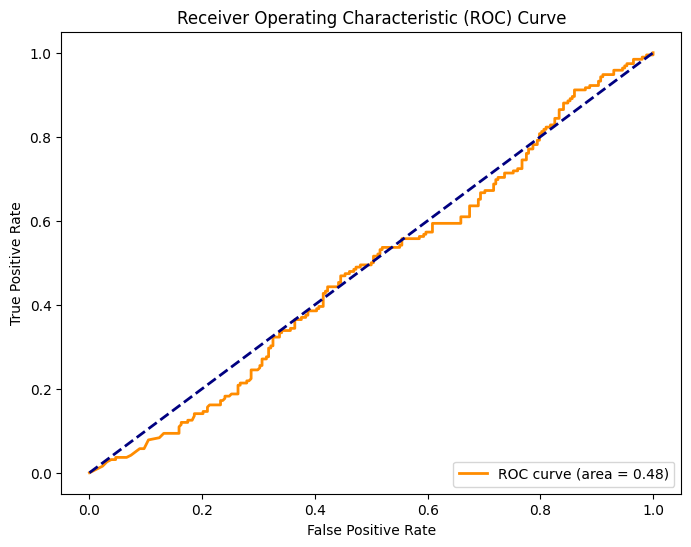

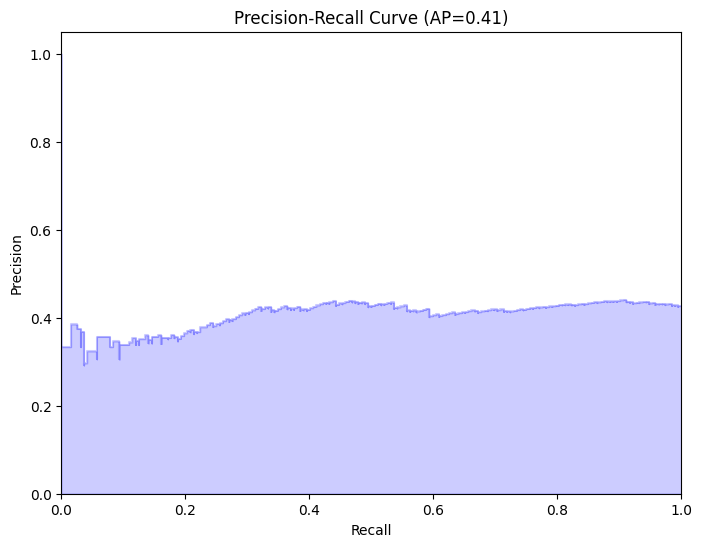

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")
# Plot the confusion matrix
true_labels = valid_generator.classes
predictions = model.predict(valid_generator)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
 xticklabels=['Predicted Negative', 'Predicted Positive'],
 yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predictions)
average_precision = average_precision_score(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:.2f})'.format(average_precision))
plt.show()

In [30]:
model.save("model_saved/inception-v3-30%-test-size-epoch-50-178-218.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
